In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install python-levenshtein

In [ ]:
import nltk
import Levenshtein as lev

PARTS = ["Framework1","CDR1","Framework2","CDR2","Framework3","CDR3","Framework4"]

In [ ]:
# method to extract ID
def extract_id(seq):
    seq = seq.split(" |")
    id = int(seq[0].split(":")[1])
    return id

# method to extract cloneID
def extract_cloneID(seq):
    seq = seq.split(" |")
    cloneID = int(seq[1].split(":")[1])
    return cloneID

# method to extract v_gene
def extract_vgene(seq):
    seq = seq.split(" |")
    vgene = seq[2].split(":")[1]
    return vgene

# method to extract j_gene
def extract_jgene(seq):
    seq = seq.split(" |")
    jgene = seq[3].split(":")[1]
    return jgene

# method to extract CDR3 Length
def extract_CDR3Length(seq):
    seq = seq.split(" |")
    length = int(seq[4].split(":")[1])
    return length

In [ ]:
## reading the file and parsing the data for SEQ % METADATA
def readFasta(file_name):
    sequences=[]
    meta=[]
    with open(file_name) as f:
        while True:
            met=f.readline().rstrip()
            seq=f.readline().rstrip()
            if len(seq)==0:
                break
            sequences.append(seq)
            meta.append(met)
    return sequences,meta

### Defining parameters

In [ ]:
CDR3LEN = 0
CLONEID = 0
VGENE = "*"

CDR3LEN = 78     # 36
#CLONEID = 834782
#VGENE = "IGHV3-30-3"

## Saving the files in direcories

In [ ]:
# loop over the fasta files and create dic to save: id --> [nuc_seq, amino_seq]
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject3.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject3.txt") # Amino acids
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject4.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject4.txt") # Amino acids
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject5.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject5.txt") # Amino acids
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject7.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject7.txt") # Amino acids
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject8.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject8.txt") # Amino acids
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject9.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject9.txt") # Amino acids
nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject10.txt") #origin file - nucleotid
my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject10.txt") # Amino acids
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject14.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject14.txt") # Amino acids
# nuc_seqs, nuc_mtas = readFasta("drive/MyDrive/Colab Notebooks/covid_uniqueinstance2_subject15.txt") #origin file - nucleotid
# my_fasta_seqs, my_fasta_mtas = readFasta("drive/MyDrive/Colab Notebooks/my_fasta_subject15.txt") # Amino acids

nuc_aminoAcidsDictionary = {}

for nuc_details, nuc_seq , amino_details, amino_seq in zip(nuc_mtas, nuc_seqs, my_fasta_mtas, my_fasta_seqs):
    nuc_id = extract_id(nuc_details)
    amino_id = extract_id(amino_details)
    cdr3len = extract_CDR3Length(nuc_details)
    cloneID = extract_cloneID(nuc_details)
    vgene = extract_vgene(nuc_details)
    if nuc_id == amino_id and CDR3LEN in [cdr3len,0] and CLONEID in [cloneID,0] and VGENE in [vgene,"*"] :
        nuc_aminoAcidsDictionary[nuc_id] = [nuc_seq, amino_seq, nuc_details]

In [ ]:
# loop over the fasta files and create dic to save: id --> [nuc_seq, amino_seq]
nucDictionary = {}
aminoAcidsDictionary = {}
for nuc_amino_id, nuc_amino_item  in nuc_aminoAcidsDictionary.items():
    nuc_seq = nuc_amino_item[0]
    amino_seq = nuc_amino_item[1]
    nuc_amino_details = nuc_amino_item[2]
    cdr3len = extract_CDR3Length(nuc_amino_details)
    nucDictionary[nuc_amino_id] = [
        nuc_seq[0:78], 
        nuc_seq[78:114], 
        nuc_seq[114:165], 
        nuc_seq[165:195], 
        nuc_seq[195:312], 
        nuc_seq[312:312 + cdr3len], 
        nuc_seq[312 + cdr3len :]
    ]
    aminoAcidsDictionary[nuc_amino_id] = [
        amino_seq[0 : int(78/3)], 
        amino_seq[int(78/3) : int(114/3)], 
        amino_seq[int(114/3) : int(165/3)], 
        amino_seq[int(165/3) : int(195/3)], 
        amino_seq[int(195/3) : int(312/3)], 
        amino_seq[int(312/3) : int(312/3 + int(cdr3len)/3)], 
        amino_seq[int(312/3) + int(cdr3len/3) : ]
    ]

In [ ]:
n = len(nuc_aminoAcidsDictionary.keys())
print("Number of nodes: ", n)

## Comparison Methods
###### In the methods below we will relate to cell's part's sequence as 'part' and in the rest of the code 'part' will be relate to part's number

In [ ]:
# Compare nuc without order
# def compareNucParts(part1, part2):
#    freq_part1 = nltk.FreqDist(part1)
#    freq_part2 = nltk.FreqDist(part2)
#    knownChars1 = freq_part1['A']+freq_part1['T']+freq_part1['C']+freq_part1['G']
#    knownChars2 = freq_part2['A']+freq_part2['T']+freq_part2['C']+freq_part2['G']
#    max_value = max(knownChars1,knownChars2,1)
#    a = (1-abs(freq_part1['A'] - freq_part2['A'])/max_value)/4
#    t = (1-abs(freq_part1['T'] - freq_part2['T'])/max_value)/4
#    c = (1-abs(freq_part1['C'] - freq_part2['C'])/max_value)/4
#    g = (1-abs(freq_part1['G'] - freq_part2['G'])/max_value)/4
#    return (a+t+c+g)

# Compare nuc without order ('AT' compare to 'GC')
def compareNucParts(part1, part2):
    freq_part1 = nltk.FreqDist(nltk.bigrams(part1))
    freq_part2 = nltk.FreqDist(nltk.bigrams(part2))
    known_chars = [('A','T'),('G','C')]
    knownChars1 = sum([freq_part1[x] for x in known_chars])
    knownChars2 = sum([freq_part2[x] for x in known_chars])
    max_value = max(knownChars1,knownChars2,1)
    at = (1- abs(freq_part1[('A','T')] - freq_part2[('A','T')])/max_value) / 2
    gc = (1- abs(freq_part1[('G','C')] - freq_part2[('G','C')])/max_value) / 2
    return at+gc

# Compare amino without order
def compareAminoParts(part1, part2):
    freq_part1 = nltk.FreqDist(part1)
    freq_part2 = nltk.FreqDist(part2)
    known_chars = ['A','C','D','E','F','G','H','I','J','K','L','M','P','Q','R','S','T','V','W','Y','s']
    knownChars1 = sum([freq_part1[x] for x in known_chars])    
    knownChars2 = sum([freq_part2[x] for x in known_chars])
    max_value = max(knownChars1,knownChars2,1)
    total = sum( (1-abs(freq_part1[x] - freq_part2[x])/max_value)/len(known_chars) for x in known_chars )
    return total

# Compare with order
def levCompare(part1, part2):
    ratio = lev.ratio(part1, part2)
    return ratio

## Methods For Distribute Uncertainty Level Part's Sequence
##### By that we will know the relevancy of the sequence or the comparison with it

In [ ]:
# Check the ratio of the unknown positions
def checkUnknownRatio(part):
    freq_part = nltk.FreqDist(part)
    unknown_chars = ['N','x']
    unknownChars = sum([freq_part[x] for x in unknown_chars])    
    total = unknownChars/len(part)
    return total

## Making The Multi-Graph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.MultiGraph()
g.add_nodes_from(nuc_aminoAcidsDictionary.keys())

customGraph = nx.Graph()
customGraph.add_nodes_from(nuc_aminoAcidsDictionary.keys())

## Methods For Presentation of The Parts

In [ ]:
# #Get the name of the color which is suitable for this part of the B-Cells and this color will determine later the color of the edge
# def getColorByPart(part):
#   return {
#     0 : 'brown',
#     1 : 'red',
#     2 : 'yellow',
#     3 : 'black',
#     4 : 'purple', #FRM3
#     5 : 'green',
#     6 : 'blue',
#   }[part]

#Get the name of this part of the B-Cells by number
def gePartName(part):
  return {
    0 : 'Framework1',
    1 : 'CDR1',
    2 : 'Framework2',
    3 : 'CDR2',
    4 : 'Framework3',
    5 : 'CDR3',
    6 : 'Framework4',
  }[part]

## B-Cells' Parts Comparison

In [ ]:
# creating df for edges
#import pandas as pd

# giving each two cells a value that represent the distance of the similarity between these parts
for nuc_id_1, nuc_parts_1 in nucDictionary.items():
  for nuc_id_2, nuc_parts_2 in nucDictionary.items():
    if nuc_id_1 == nuc_id_2:
      break
    for part in range(len(PARTS)):
      amino1 = aminoAcidsDictionary.get(nuc_id_1)[part]
      amino2 = aminoAcidsDictionary.get(nuc_id_2)[part]
      dis_nuc_with_order = levCompare(nuc_parts_1[part],nuc_parts_2[part])
      dis_nuc_without_order = compareNucParts(nuc_parts_1[part],nuc_parts_2[part])
      dis_amino_with_order = levCompare(amino1, amino2)
      dis_amino_without_order = compareAminoParts(amino1, amino2)
      nuc_dis = (dis_nuc_with_order + dis_nuc_without_order) / 2
      amino_dis = (dis_amino_with_order + dis_amino_without_order) / 2
      total_dis = (dis_nuc_with_order + dis_nuc_without_order + dis_amino_with_order + dis_amino_without_order) / 4
      uncertainty = max(checkUnknownRatio(nuc_parts_1[part]),checkUnknownRatio(nuc_parts_2[part]))
      g.add_edge(nuc_id_1, nuc_id_2, part = part, nuc_dis = nuc_dis, dis_nuc_with_order = dis_nuc_with_order, dis_nuc_without_order = dis_nuc_without_order, dis_amino_with_order = dis_amino_with_order, dis_amino_without_order = dis_amino_without_order, amino_dis = amino_dis, total_dis = total_dis, uncertainty = uncertainty)
      
      if part in [6] and uncertainty < 0.85 and dis_amino_without_order > 0.99 :
        customGraph.add_edge(nuc_id_1, nuc_id_2, weight = dis_amino_without_order)

In [ ]:
import pandas as pd

# export to csv file - Nuc
# file for edges
source = [];
target = []
for x in g.edges():
  source.append(x[0])
  target.append(x[1])

#create new df 
# df_nodes = pd.DataFrame({'source':source, 'target': target})
df_nodes = pd.DataFrame({'Id':g.nodes(),'Label':g.nodes(),'CDR3Length':(extract_CDR3Length(nuc_aminoAcidsDictionary.get(node)[2]) for node in g.nodes()),'cloneID':(extract_cloneID(nuc_aminoAcidsDictionary.get(node)[2]) for node in g.nodes()),'V_Gene':(extract_vgene(nuc_aminoAcidsDictionary.get(node)[2]) for node in g.nodes()), 'J_Gene':(extract_vgene(nuc_aminoAcidsDictionary.get(node)[2]) for node in g.nodes())})
print (df_nodes)
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject3.csv')
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject4.csv')
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject5.csv')
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject7.csv')
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject8.csv')
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject9.csv')
df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject10.csv')
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject14.csv')
# df_nodes.to_csv('drive/MyDrive/Colab Notebooks/df_nodes_subject15.csv')

         Id    Label  CDR3Length  cloneID          V_Gene          J_Gene
0   4503389  4503389          78  1023619         IGHV1-8         IGHV1-8
1   4503417  4503417          78  1023617         IGHV1-8         IGHV1-8
2   4517630  4517630          78  1038268        IGHV4-34        IGHV4-34
3   4517642  4517642          78  1038268        IGHV4-34        IGHV4-34
4   4517647  4517647          78  1038268        IGHV4-34        IGHV4-34
..      ...      ...         ...      ...             ...             ...
67  5126417  5126417          78  1022704        IGHV1-69        IGHV1-69
68  5140317  5140317          78  1038264        IGHV4-34        IGHV4-34
69  5141084  5141084          78  1027533  IGHV3-23|3-23D  IGHV3-23|3-23D
70  5147287  5147287          78  1042738        IGHV4-34        IGHV4-34
71  5153711  5153711          78  1034451         IGHV3-9         IGHV3-9

[72 rows x 6 columns]


In [ ]:
partsforcsv = []
sourcesforcsv = []
targetsforcsv = []
dis_nuc_with_orderforcsv = []
dis_nuc_without_orderforcsv = []
dis_amino_with_orderforcsv = []
dis_amino_without_orderforcsv = []
nucdisforcsv = []
aminodisforcsv = []
totaldisforcsv = []
uncertaintyforcsv = []
for u,v in set(g.edges()):
  for tuple1 in g[u][v].items():
    attributes = tuple1[1]
    sourcesforcsv.append(u)
    targetsforcsv.append(v)
    partsforcsv.append(gePartName(attributes['part']))
    dis_nuc_with_orderforcsv.append(attributes['dis_nuc_with_order'])
    dis_nuc_without_orderforcsv.append(attributes['dis_nuc_without_order'])
    dis_amino_with_orderforcsv.append(attributes['dis_amino_with_order'])
    dis_amino_without_orderforcsv.append(attributes['dis_amino_without_order'])
    nucdisforcsv.append(attributes['nuc_dis'])
    aminodisforcsv.append(attributes['amino_dis'])
    totaldisforcsv.append(attributes['total_dis'])
    uncertaintyforcsv.append(attributes['uncertainty'])

df_edges = pd.DataFrame({'source':sourcesforcsv,'target':targetsforcsv,'part':partsforcsv, 'nuc_with_order_similarity':dis_nuc_with_orderforcsv, 'nuc_without_order_similarity':dis_nuc_without_orderforcsv, 'amino_with_order_similarity':dis_amino_with_orderforcsv, 'amino_without_order_similarity':dis_amino_without_orderforcsv, 'nuc_similarity':nucdisforcsv,'amino_similarity':aminodisforcsv,'total_similarity':totaldisforcsv,'uncertainty':uncertaintyforcsv})
print(df_edges)
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject3.csv')
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject4.csv')
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject5.csv')
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject7.csv')
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject8.csv')
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject9.csv')
df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject10.csv')
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject14.csv')
# df_edges.to_csv('drive/MyDrive/Colab Notebooks/df_edges_subject15.csv')

        source   target  ... total_similarity  uncertainty
0      4876494  5028106  ...         1.000000     0.961538
1      4876494  5028106  ...         1.000000     0.055556
2      4876494  5028106  ...         1.000000     0.000000
3      4876494  5028106  ...         0.962698     0.000000
4      4876494  5028106  ...         0.966261     0.008547
...        ...      ...  ...              ...          ...
17887  4603100  4705146  ...         0.762955     0.000000
17888  4603100  4705146  ...         0.750213     0.000000
17889  4603100  4705146  ...         0.757580     0.000000
17890  4603100  4705146  ...         0.762466     0.012821
17891  4603100  4705146  ...         1.000000     0.035714

[17892 rows x 11 columns]


In [ ]:
import statistics
print("Variance:\n", statistics.variance(g))

degrees = {k: v for k, v in sorted(nx.degree(g), key=lambda item: item[1] , reverse=True)}
print('\nNodes degrees:\n', degrees)

G_deg = nx.degree_histogram(g)
G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
print('\nAverage degree:\n {}'.format(sum(G_deg_sum) / g.number_of_nodes()))

closenessCentrality = {k: v for k, v in sorted(nx.closeness_centrality(g).items(), key=lambda item: item[1] , reverse=True)}
print('\nCloseness centrality:\n', closenessCentrality)

pagerank = {k: v for k, v in sorted(nx.pagerank_scipy(g).items(), key=lambda item: item[1] , reverse=True)}
print('\nPagerank:\n', pagerank)

#betweennessCentrality = {k: v for k, v in sorted(nx.betweenness_centrality(g).items(), key=lambda item: item[1] , reverse=True)}
#print('Betweenness centrality:', betweennessCentrality)

Variance:
 40294572566.49687

Nodes degrees:
 {4503389: 497, 4503417: 497, 4517630: 497, 4517642: 497, 4517647: 497, 4517655: 497, 4517658: 497, 4529964: 497, 4529968: 497, 4529982: 497, 4536641: 497, 4548623: 497, 4548631: 497, 4551610: 497, 4556741: 497, 4556747: 497, 4587038: 497, 4587527: 497, 4591896: 497, 4593506: 497, 4603100: 497, 4607106: 497, 4613323: 497, 4626182: 497, 4626241: 497, 4676530: 497, 4676545: 497, 4677147: 497, 4689852: 497, 4705146: 497, 4768049: 497, 4792930: 497, 4798277: 497, 4801844: 497, 4801863: 497, 4801866: 497, 4803398: 497, 4803754: 497, 4818458: 497, 4821432: 497, 4863716: 497, 4866031: 497, 4866039: 497, 4866060: 497, 4876492: 497, 4876494: 497, 4876495: 497, 4876500: 497, 4897454: 497, 4897465: 497, 4905386: 497, 4906989: 497, 4907194: 497, 4916084: 497, 4918040: 497, 4923440: 497, 4928585: 497, 4967377: 497, 5009443: 497, 5019197: 497, 5021466: 497, 5021480: 497, 5028106: 497, 5037313: 497, 5038333: 497, 5052514: 497, 5126406: 497, 5126417: 497, 5

In [ ]:
 nuc_freqDistDictionary = {}
 for x, y in nucDictionary.items():
     nuc_freqDistDictionary[x] = [nltk.FreqDist(y[0]),nltk.FreqDist(y[1]),nltk.FreqDist(y[2]),nltk.FreqDist(y[3]),nltk.FreqDist(y[4]),nltk.FreqDist(y[5]),nltk.FreqDist(y[6])]
 for x,y in nuc_freqDistDictionary.items():
    print(x,y)

4503389 [FreqDist({'N': 75, '-': 3}), FreqDist({'-': 12, 'A': 7, 'C': 7, 'T': 6, 'N': 2, 'G': 2}), FreqDist({'G': 21, 'A': 12, 'T': 9, 'C': 9}), FreqDist({'A': 10, 'C': 6, '-': 6, 'T': 4, 'G': 4}), FreqDist({'A': 32, 'G': 31, 'C': 31, 'T': 20, '-': 3}), FreqDist({'G': 26, 'T': 22, 'C': 15, 'A': 15}), FreqDist({'C': 10, 'A': 7, 'G': 6, 'T': 4, 'N': 1})]
4503417 [FreqDist({'N': 75, '-': 3}), FreqDist({'-': 12, 'A': 8, 'C': 7, 'T': 6, 'N': 2, 'G': 1}), FreqDist({'G': 22, 'A': 11, 'T': 9, 'C': 9}), FreqDist({'A': 11, 'C': 6, '-': 6, 'T': 4, 'G': 3}), FreqDist({'G': 32, 'A': 31, 'C': 29, 'T': 21, '-': 3, 'N': 1}), FreqDist({'G': 25, 'C': 21, 'A': 16, 'T': 14, 'N': 2}), FreqDist({'C': 10, 'A': 7, 'G': 6, 'T': 4, 'N': 1})]
4517630 [FreqDist({'N': 75, '-': 3}), FreqDist({'-': 12, 'T': 8, 'G': 5, 'C': 5, 'A': 4, 'N': 2}), FreqDist({'G': 23, 'C': 11, 'A': 9, 'T': 8}), FreqDist({'-': 9, 'A': 8, 'C': 5, 'T': 4, 'G': 4}), FreqDist({'C': 37, 'T': 27, 'G': 26, 'A': 23, '-': 3, 'N': 1}), FreqDist({'C'

In [ ]:
 aminoAcids_freqDistDictionary = {}
 for x, y in aminoAcidsDictionary.items():
     aminoAcids_freqDistDictionary[x] = [nltk.FreqDist(y[0]),nltk.FreqDist(y[1]),nltk.FreqDist(y[2]),nltk.FreqDist(y[3]),nltk.FreqDist(y[4]),nltk.FreqDist(y[5]),nltk.FreqDist(y[6])]
 for x,y in aminoAcids_freqDistDictionary.items():
    print(x,y)

4503389 [FreqDist({'x': 25, '-': 1}), FreqDist({'-': 4, 'Y': 2, 'T': 2, 'x': 1, 'F': 1, 'S': 1, 'D': 1}), FreqDist({'W': 3, 'G': 3, 'Q': 2, 'I': 1, 'N': 1, 'V': 1, 'R': 1, 'A': 1, 'T': 1, 'L': 1, ...}), FreqDist({'N': 3, '-': 2, 'M': 1, 'P': 1, 'S': 1, 'G': 1, 'T': 1}), FreqDist({'T': 5, 'Y': 4, 'A': 3, 'R': 3, 'S': 3, 'G': 2, 'Q': 2, 'V': 2, 'M': 2, 's': 2, ...}), FreqDist({'Y': 5, 'W': 4, 'G': 3, 'R': 2, 'V': 2, 'A': 1, 's': 1, 'E': 1, 'N': 1, 'F': 1, ...}), FreqDist({'T': 3, 'V': 2, 's': 2, 'K': 1, 'G': 1})]
4503417 [FreqDist({'x': 25, '-': 1}), FreqDist({'-': 4, 'Y': 2, 'T': 2, 'x': 1, 'F': 1, 'N': 1, 'D': 1}), FreqDist({'W': 3, 'G': 3, 'Q': 2, 'I': 1, 'S': 1, 'V': 1, 'R': 1, 'A': 1, 'T': 1, 'L': 1, ...}), FreqDist({'N': 4, '-': 2, 'M': 1, 'P': 1, 'G': 1, 'T': 1}), FreqDist({'T': 5, 'Y': 4, 'A': 3, 'R': 3, 'V': 3, 'S': 3, 'G': 2, 'Q': 2, 'M': 2, 's': 2, ...}), FreqDist({'Y': 5, 'G': 4, 'A': 2, 'R': 2, 'D': 2, 'E': 2, 'H': 1, 'S': 1, 'P': 1, 'I': 1, ...}), FreqDist({'T': 3, 'V': 2, 

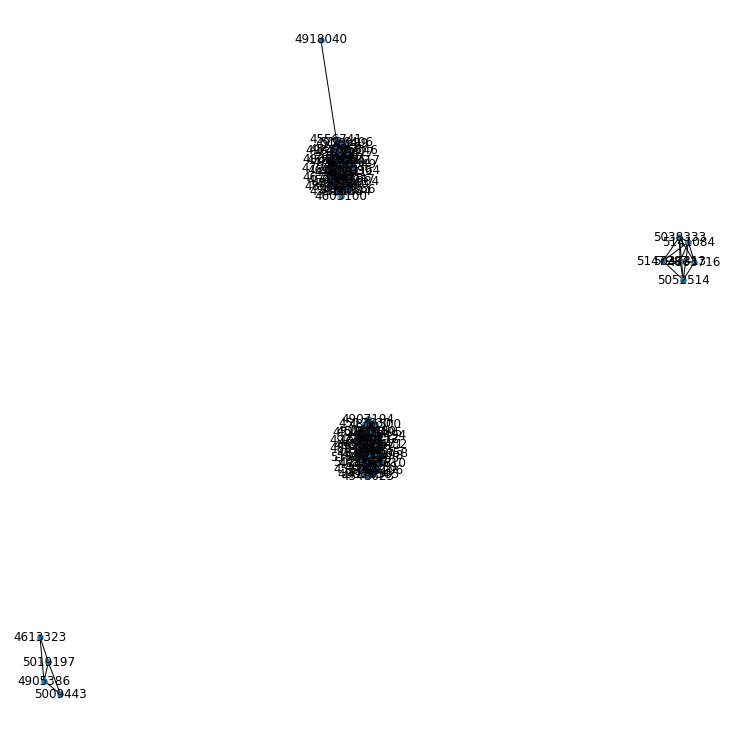

In [ ]:
weights = [customGraph[u][v]['weight'] for u,v in customGraph.edges()]
nx.draw_spring(customGraph, with_labels = True, width=weights, node_size=30)
plt.gcf().set_size_inches(10, 10)
plt.show()



In [ ]:

import statistics
print("Variance:\n", statistics.variance(customGraph))
print("\nStandard deviation:\n", statistics.stdev(customGraph))

degrees = {k: v for k, v in sorted(nx.degree(customGraph), key=lambda item: item[1] , reverse=True)}
print('\nNodes degrees:\n', degrees)

G_deg = nx.degree_histogram(customGraph)
G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
print('\nAverage degree:\n {}'.format(sum(G_deg_sum) / customGraph.number_of_nodes()))

closenessCentrality = {k: v for k, v in sorted(nx.closeness_centrality(customGraph).items(), key=lambda item: item[1] , reverse=True)}
print('\nCloseness centrality:\n', closenessCentrality)

betweennessCentrality = {k: v for k, v in sorted(nx.betweenness_centrality(customGraph).items(), key=lambda item: item[1] , reverse=True)}
print('\nBetweenness centrality:\n', betweennessCentrality)

sub_graphs = nx.number_connected_components(customGraph)
print("\nNumber of communities:\n", sub_graphs)


Variance:
 40294572566.49687

Standard deviation:
 200735.0805576765

Nodes degrees:
 {4517630: 30, 4517642: 30, 4517647: 30, 4517655: 30, 4517658: 30, 4548623: 30, 4548631: 30, 4551610: 30, 4556741: 30, 4587527: 30, 4607106: 30, 4676530: 30, 4676545: 30, 4689852: 30, 4803398: 30, 4803754: 30, 4818458: 30, 4821432: 30, 4876492: 30, 4876494: 30, 4876495: 30, 4897454: 30, 4897465: 30, 4907194: 30, 4928585: 30, 5021466: 30, 5021480: 30, 5028106: 30, 5140317: 30, 5153711: 30, 4503389: 29, 4503417: 29, 4529964: 29, 4529968: 29, 4529982: 29, 4536641: 29, 4556747: 29, 4587038: 29, 4591896: 29, 4593506: 29, 4603100: 29, 4626182: 29, 4626241: 29, 4677147: 29, 4705146: 29, 4768049: 29, 4792930: 29, 4798277: 29, 4801844: 29, 4801863: 29, 4801866: 29, 4866031: 29, 4866039: 29, 4866060: 29, 4876500: 29, 4906989: 29, 4916084: 29, 4923440: 29, 4967377: 29, 5126406: 29, 5126417: 29, 4863716: 5, 5037313: 5, 5038333: 5, 5052514: 5, 5141084: 5, 5147287: 5, 4905386: 3, 5019197: 3, 4613323: 2, 5009443: 2, 